# FIT1043 Assignment 2 
# CHEW YANG XUAN - 33520496

-------------------------------------------------------------------------------------------------------------------------

## Introduction 

This report mainly is to conduct predictive analytics by building predictive models such as SVM and Random Forest Classification on the provided dataset which mainly focus on the music genre dataset from Spotify. The report is divided into Part A and Part B which are as follows:
- Part A - Classification
- Part B - Selection of Dataset, Clustering 

The aim of this assignment is to:
1. Read and explain the data provided using basic statistics
2. Split the dataset into training and testing
3. Conduct multi-class classification using Support Vector Machine (SVM)
4. Evaluate and compare predictive models used
5. Explore and select a particular dataset that meets certain criteria
6. Manage missing data within the dataset
7. Conduct clustering using k-means


--------------------------------------------------------------------------------------------------------------------------

## Part A: Classification

### A1. Supervised Learning

Question 1

In supervised machine learning, it uses labeled data to allow the algorithms to learn to predict outcome from the input data. The main goal is to approximate the mapping function so well that when we have new input data(x), we are able to predict the output variable (y) for that data. This is important to allow us to make prediction or decision when there is given new data. 
Labelled data is a designation for peices of data that have been tagged with one or more labels identifying certain properties or characteristics, or classifications or contained object. For instance, in the provided music dataset, each music has been classified into different music genre such as Anime, Blues and others. These labels serve as a clear guide for a supervised machine learning algorithm to learn from. Train and test datasets are subsets of the labelled data used in supervised learning.

For labeled data, they will be classify into two different sets which are training dataset and the test dataset. Train dataset is use to train and teach the machine learning model. It consists of input and output which will be use to train the model to extract the underlying features to make correct predictions. A test dataset is use to evaluate a model's performance. It consists of the input and output pairs that the model does not seen before in the training dataset. The model makes predictions on the test data, and it's performance is evaluated to determine how accurate is the model predicting a set of unseen data. Hence, it is important for us to seperate both training and test dataset in order to evaluate the model's performance to avoid overfitting issue.

Question 2

In [24]:
# import necessary libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
dataset = pd.read_csv('FIT1043-MusicGenre-Dataset.csv')

# Initialize LabelEncoder which transform names to numerical labels
label_encoder = LabelEncoder()
dataset['track_numeric'] = label_encoder.fit_transform(dataset['track_name'])
dataset['artist_numeric'] = label_encoder.fit_transform(dataset['artist_name'])

# Input Data: all columns except for the labelled data, 
x = dataset.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,15,16]].values

# Label Data: music genre
y = dataset.iloc[:, 14].values

Question 3

In [25]:
from sklearn.model_selection import train_test_split

#split the 25% of the data for testing purposes
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

### A2. Classification (training)

Question 1

There are two types of classification, binary classification and multi-class classification. Binary classification is a process of classifying instances in which a given data is being classified into two classes. It’s a kind of prediction about which of two groups the thing belongs to based on the input features. Some of the most algorithms used by binary classification are Logistic Regression and Decision Trees. Multi-class classification is the process of classifying elements into unlimited number of classes. Unlike binary, it doesn’t restrict the number of classes. 

The main difference between two types of classification are binary classification can only have two classes for classification while multi-class classification has more than two classes for classifications. The classes are often represented by integers value. Examples for binary classification is email spam detection (spam or not spam) while example for multi-class classification is face classification.

Question 2

It is important to scale the data accordingly in machine learning because some of the objective functions will not function properly without feature scaling or normalisation. It will return inaccurate result when one of the features has a broad range of values, as the predictive model will be heavily influenced by this particular feature. Thus, every features should be normalised so that they have equal weightage and this prevent dominance.

For instance, in the provided dataset, the popularity data range from 0 to 99 while other features such as danceability and energy ranges from 0 to 1. By scaling the all the features for input data, they will then have similar ranges which eventually makes more balanced predictions.

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# scale it to have a mean of 0 and a certain standard deviation. 
x_train_scaled = sc.fit_transform(x_train)

# applied to testing dataset
x_test_scaled = sc.transform(x_test)

Question 3

(a) Support Vector Machine (SVM) is a supervised machine learning algorithm which mainly use for classification and regression. The main goal of the SVM algorithm is to find the best hyperplane in N-dimentional space which seperates different classes in the feature space. The hyperplane maximise the margin between the closest points of different classes to improve model performance. Margin refers to the distance between the hyperplane and the nearest data points from each class. The dimension of the hyperplane depends on the number of features. For instance, if it is a binary classification, the hyperplane would be a line that divides the space into two regions, one for each class. SVM can be divided into two main parts which are Linear SVM and Non-Linear SVM. Linear SVM refers to the data can be linearly seperated by a single straight line while Non-Linear SVM is use to classify the data when it cannot be seperated into two classes by a straight line.

(b) Kernel in SVM is a mathematical function which use to map the original input data points into high-dimensional feature spaces, so that the hyperplane can be easily found out even if the data points are not linearly separable in the original input space. This can be reach without calculating the coordinates of the data in the space. There are different types of kernels such as Linear Kernel, Polynomial Kernel, RBF Kernel and Sigmoid Kernel which have different tasks.

In [27]:
# (c) Build SVM model
from sklearn import svm
svm_model = svm.SVC(kernel='rbf', C=1, gamma=1)
svm_model.fit(x_train_scaled, y_train)

SVC(C=1, gamma=1)

Gradient Boosting Classification

Gradient Boosting Classification is one of the machine learning technique which continuously train the models to improve its overall predictive performance. It is one of the ensemble technique used to improve the accuracy of the result by combining multiple models together. In Gradient Boosting Classification, decision trees serve as weak learners and each tree learns to make predictions based on the input data, capture relationship in between input data and the music genre.

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(n_estimators=400,learning_rate=0.1,random_state=0,max_features=10)

# Fit train data to GBC
gbc.fit(x_train_scaled,y_train)
# print(accuracy_score(y_test, gbc.predict(x_test_scaled)))

GradientBoostingClassifier(max_features=10, n_estimators=400, random_state=0)

### A3. Classification (prediction)

Question 1

In [29]:
# Prediction for SVM model
y_pred_svm = svm_model.predict(x_test_scaled)

# Prediction for Gradient Boosting Classifier
y_pred_gbc = gbc.predict(x_test_scaled)

Question 2

In [30]:
# Making the Confusion Matrix for SVM model
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[190,   5,  28,   5, 102,  48,  62,  63,  34, 121],
       [ 21, 412,  56,  32,   7,  45,   0,  63,   0,   3],
       [ 34,  60, 297,   9,  52,  63,   0, 139,   1,  22],
       [ 15,  19,  15, 501,   3,  17,   0,  94,   0,   5],
       [ 49,  12,  67,   4, 285,  26,  13,  71,  11, 100],
       [ 39,  22,  28,   5,  29, 346,  16, 119,   7,  20],
       [ 25,   0,   1,   0,   9,  14, 263,  62, 224,  41],
       [ 16,   3,  72,  31,  34, 104,  11, 383,   5,  16],
       [ 29,   0,   0,   0,  11,  17, 297,  41, 169,  68],
       [113,   1,  19,   1,  42,  26,  32,  69,  29, 300]], dtype=int64)

In [32]:
# Making the Confusion Matrix for Gradient Boosting Classification model
from sklearn.metrics import confusion_matrix
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
cm_gbc

array([[261,   3,  17,   2,  70,  31,  38,  46,  34, 156],
       [ 15, 556,  25,  12,   4,  18,   0,   4,   0,   5],
       [ 35,  27, 434,  10,  45,  26,   3,  70,   0,  27],
       [ 18,  12,  17, 580,   3,  12,   0,  22,   0,   5],
       [ 33,   3,  24,   1, 430,   6,  11,  35,   9,  86],
       [ 40,  13,  31,   6,  18, 420,  11,  66,   4,  22],
       [ 26,   0,   0,   0,   4,   4, 322,   7, 249,  27],
       [ 31,   6,  75,  33,  30,  73,  11, 391,   3,  22],
       [ 20,   0,   0,   0,   9,   1, 291,   3, 240,  68],
       [ 69,   1,   6,   1,  46,   4,  27,  11,  38, 429]], dtype=int64)

Question 3

In [36]:
from sklearn.metrics import accuracy_score
#compute the score of each model
print("Accuracy of SVM: ", accuracy_score(y_test, y_pred_svm))
print("Accuracy of GBC: ", accuracy_score(y_test, y_pred_gbc))

Accuracy of SVM:  0.4847457627118644
Accuracy of GBC:  0.626040061633282


Gradient Boosting Classification model perform better than SVM model. Based on the confusion matrix, we know that the diagonal elements are representing all the correctly predicted samples. For SVM model, there are a total of 3146 correct predictions out of a total of 6490 samples. While for Gradient Boosting Classification model, there are 4063 correct predictions out of a total of 6490 samples. There is a difference of 525 between both model. In terms of accuracy, Random Forest Classifier has a higher accuracy of 0.6260 compared to SVM with 0.4847 accuracy.  

### A4. Independent evaluation

In [37]:
# Read the CSV file
ind_data = pd.read_csv('FIT1043-MusicGenre-Submission.csv')
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on artist names and transform them to numerical labels
ind_data['track_numeric'] = label_encoder.fit_transform(ind_data['track_name'])
ind_data['artist_numeric'] = label_encoder.fit_transform(ind_data['artist_name'])
ind_x = ind_data.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15]].values 
ind_x_scaled = sc.transform(ind_x)

In [38]:
sub_file = pd.read_csv("33520496-ChewYangXuan-v1.csv")

# Make predictions using your best model
music_predictions = gbc.predict(ind_x_scaled)
# Add predictions to the submission_data DataFrame
sub_file['music_genre'] = music_predictions
sub_file.to_csv("33520496-ChewYangXuan-v1.csv", index=False)

--------------------------------------------------------------------------------------------------------------------------

## Part B: Selection of Dataset and Clustering

### Input Data: BMI Dataset

The link to access the dataset: https://www.kaggle.com/datasets/freego1/bmi-data
This dataset consists of a collection of patients BMI data. It consists only the patient's sex, age, height in inches, weight in pounds and BMI. The dataset provided consists empty values and need to be cleaned up.

### B1. Selection of a Dataset with missing data, Clustering

Question 1

In [11]:
# import necessary library
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [12]:
# Load the dataset
df = pd.read_csv('bmi_data.csv')
df.head()

,Sex,Age,Height(Inches),Weight(Pounds),BMI
0,Female,21,65.78331,112.9925,18.357646
1,Female,35,71.51521,136.4873,18.762652
2,Female,27,69.39874,153.0269,22.338985
3,Male,24,68.21660,142.3354,21.504612
4,Female,18,67.78781,144.2971,22.077669


In [13]:
# Check if there is missing values in all the columns
df.isna().sum()

Sex                0
Age                0
Height(Inches)    19
Weight(Pounds)    16
BMI               50
dtype: int64

In [14]:
# remove the rows with non value
df = df.dropna()

In [15]:
# Check again
df.isna().sum()

Sex               0
Age               0
Height(Inches)    0
Weight(Pounds)    0
BMI               0
dtype: int64

In [20]:
# filter the data to only focus on the data of age 18
df = df[df['Age'] == 18]
df.head()

,Sex,Age,Height(Inches),Weight(Pounds),BMI
4,Female,18,67.78781,144.2971,22.077669
42,Male,18,69.65814,139.6711,20.237722
46,Male,18,66.88088,145.6837,22.898436
58,Female,18,66.36418,119.3701,19.055788
96,Male,18,66.28644,120.0285,19.205862


Question 2

In [17]:
# selected the height and weight columns from the data frame
columns = ['Height(Inches)', 'Weight(Pounds)']
df_selected = df.loc[:,columns]
df_selected

,Height(Inches),Weight(Pounds)
4,67.78781,144.2971
42,69.65814,139.6711
46,66.88088,145.6837
58,66.36418,119.3701
96,66.28644,120.0285
...,...,...
24870,68.15859,124.2586
24874,65.87921,104.3570
24881,66.40245,132.6795
24895,66.84764,112.4300


In [18]:
# Run the K-means clustering over the dataset using only height and weight
# cluster the data set into 3 subgroups
kmeans = KMeans(n_clusters=3, n_init=10).fit(df_selected[['Weight(Pounds)','Height(Inches)']])

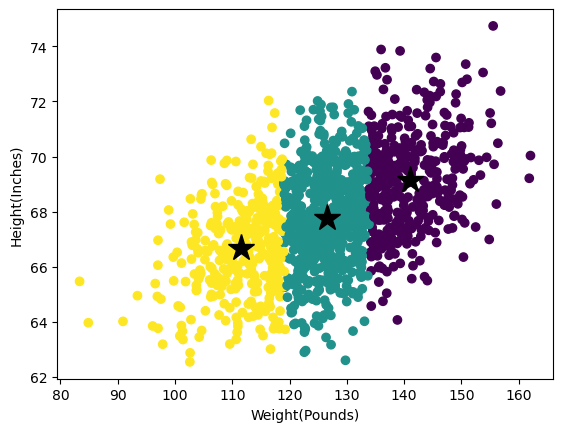

In [19]:
# Visualise the output labels
plt.scatter(
 x=df_selected['Weight(Pounds)'],y=df_selected['Height(Inches)'],
 c=kmeans.labels_)
# Visualise the cluster centers (black stars)
plt.plot(
 kmeans.cluster_centers_[:,0],
 kmeans.cluster_centers_[:,1],
 'k*',
 markersize=20
)
plt.xlabel('Weight(Pounds)')
plt.ylabel('Height(Inches)')
plt.show()


Question 3

The scatter plot above shows the application of k-means clustering to classify the teens in the age 18 into 3 different clusters based on their height and weight. Cluster 1 with yellow in colours indicating the teens which are having low weight and lower height. This indicates a low BMI values which can be categorised as underweight group. Cluster 2 with purple in colour exhibited a smaller range compared to cluster 1. This cluster are mainly concentrated around 120 to 130 Pounds which can be consider as normal weight. Cluster 3 which is green in colour indicates overweight with higher weight and height. Overall, underweight and overweight clusters poses higher range compared to normal weight cluster. It is important for underweight groups to maintain a balance healthy diet with proper proportion of nutrients. While for overweight cluster, they should change their lifestyle routine and address weight management so that they can reduce the risk of getting obesity-related health diseases. In short, the clustering results concludes that most of the teenagers nowadays are having bad lifestyle in their daily routine.

-------------------------------------------------------------------------------------------------------------------

##                                                                 References

Chugh, A. (2018, October 15). ML | Label Encoding of datasets in Python. GeeksforGeeks. https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

Hoare, J. (2017, June 5). Gradient Boosting Explained - The Coolest Kid on The Machine Learning Block. Displayr. https://www.displayr.com/gradient-boosting-the-coolest-kid-on-the-machine-learning-block/#:~:text=Gradient%20boosting%20is%20a%20type

Kharwal, A. (2021, July 1). Calculation of Accuracy using Python | Aman Kharwal. Thecleverprogrammer. https://thecleverprogrammer.com/2021/07/01/calculation-of-accuracy-using-python/

Mishra, U. (2021, May 16). Binary and Multiclass Classification in Machine Learning | Analytics Steps. Www.analyticssteps.com. https://www.analyticssteps.com/blogs/binary-and-multiclass-classification-machine-learning

Ngo, H. (2022, August 9). How to Clean Your Data in Python. Medium. https://towardsdatascience.com/how-to-clean-your-data-in-python-8f178638b98d

Saini, A. (2021a, September 20). Gradient Boosting Algorithm: A Complete Guide for Beginners. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/

Saini, A. (2021b, October 12). Support Vector Machine(SVM): A Complete guide for beginners. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/

Wolff, R. (2020, November 2). What Is Training Data in Machine Learning? MonkeyLearn Blog. https://monkeylearn.com/blog/training-data/

Zoltan, C. (2020, May 3). SVM and Kernel SVM. Medium. https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200